11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


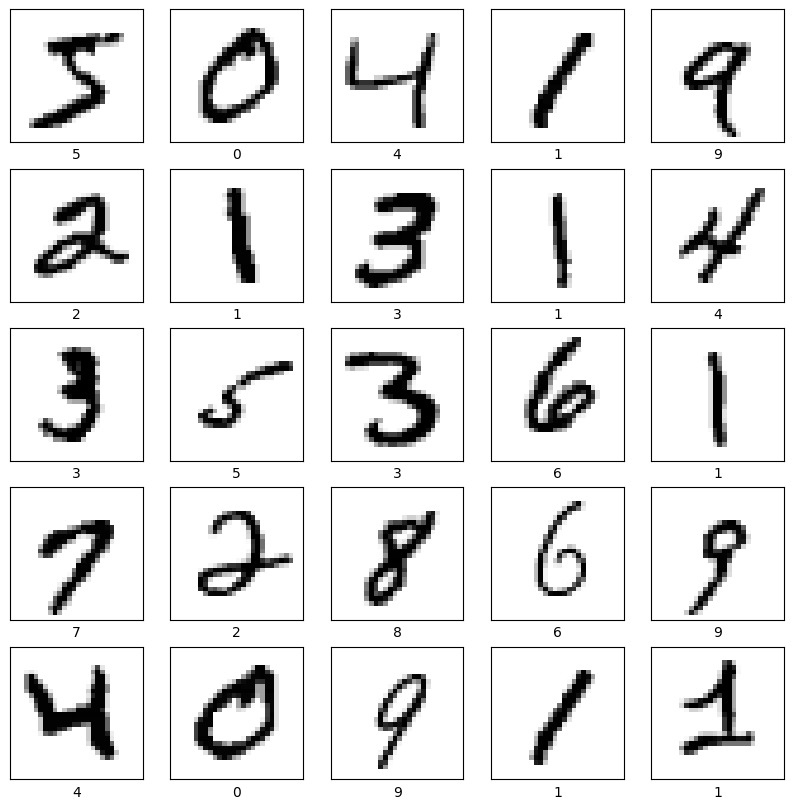

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test/ 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(y_train[i]))
plt.show()


In [3]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten

modele = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

modele.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modele.summary()


m=modele.fit(x_train,y_train, epochs=10, validation_data=(x_test,y_test))

# Extract values from training history
epochs = range(1, 11)
train_loss = m.history['loss']
val_loss = m.history['val_loss']
train_acc = m.history['accuracy']
val_acc = m.history['val_accuracy']



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8769 - loss: 0.4271 - val_accuracy: 0.9606 - val_loss: 0.1281
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9662 - loss: 0.1093 - val_accuracy: 0.9671 - val_loss: 0.0943
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9778 - loss: 0.0724 - val_accuracy: 0.9723 - val_loss: 0.0857
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9833 - loss: 0.0520 - val_accuracy: 0.9759 - val_loss: 0.0794
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9866 - loss: 0.0409 - val_accuracy: 0.9708 - val_loss: 0.0946
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9892 - loss: 0.0316 - val_accuracy: 0.9762 - val_loss: 0.0836
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9910 - loss: 0.0268 - val_accuracy: 0.9742 - val_loss: 0.0948
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9921 - loss: 0.0222

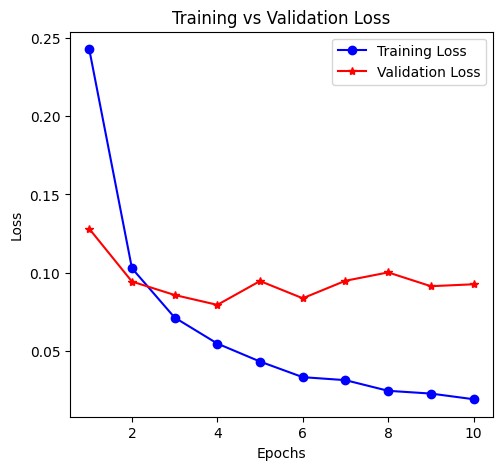

In [4]:
# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

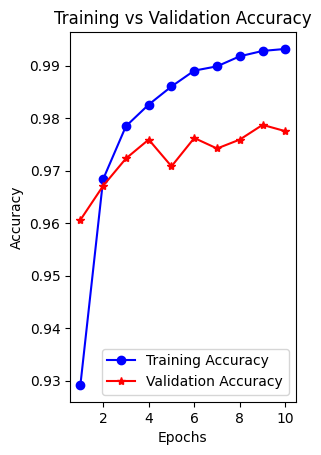

In [5]:
# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.show()

In [6]:
# Evaluate the model on test data
test_loss, test_acc = modele.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9740 - loss: 0.1096

Test Accuracy: 0.9775000214576721


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


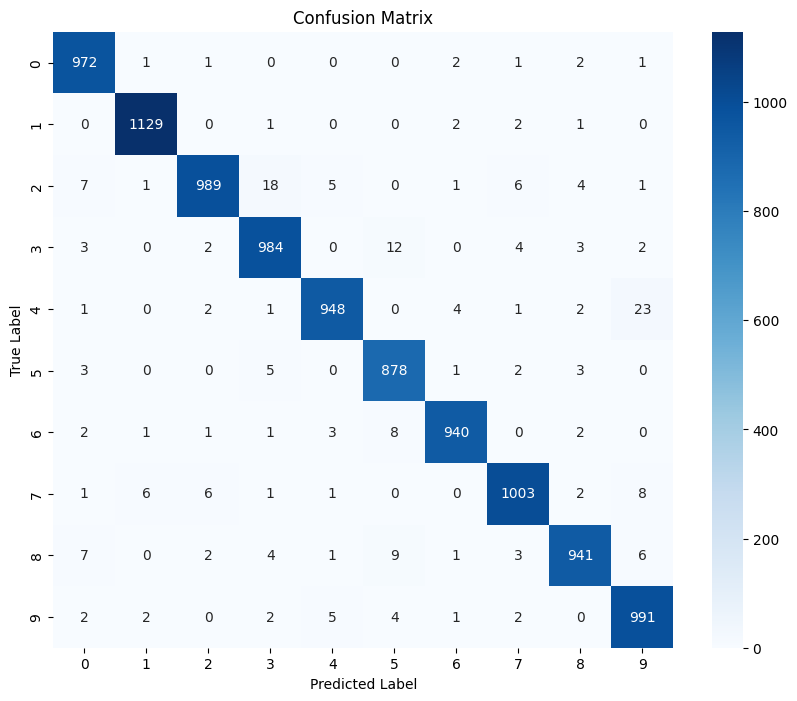

In [7]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred = modele.predict(x_test)

# Convert predictions from one-hot encoding to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [8]:
np.sum(conf_matrix, axis=1)

array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009])

In [9]:
np.diag(conf_matrix)

array([ 972, 1129,  989,  984,  948,  878,  940, 1003,  941,  991])

In [10]:
# Find the most misclassified digit
misclassified_counts = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)
most_misclassified_digit = np.argmax(misclassified_counts)

print(f"The most misclassified digit is: {most_misclassified_digit}")

The most misclassified digit is: 2


In [14]:
print(y_pred)

[[2.7916131e-10 8.1302838e-12 7.9157545e-08 ... 9.9999803e-01
  6.0078789e-11 5.2446711e-07]
 [2.1431808e-10 3.9892785e-07 9.9999946e-01 ... 2.1742955e-14
  1.0068407e-13 4.7395391e-19]
 [6.9180082e-08 9.9998504e-01 2.3872728e-06 ... 7.0046444e-06
  6.6176580e-07 2.1102523e-11]
 ...
 [3.8462391e-14 7.8734126e-15 5.2577188e-17 ... 2.0905671e-09
  1.9932870e-11 1.0348535e-07]
 [2.2396851e-15 1.5534159e-15 2.5193347e-17 ... 5.5361266e-13
  6.0438481e-09 1.8148458e-15]
 [8.5898458e-16 1.3096875e-19 2.6818984e-18 ... 2.0620289e-14
  8.5659298e-15 1.3014123e-16]]
